## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0729 21:13:42.296159  6116 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 21:13:42.306160  6116 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0729 21:13:48.297503  6116 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 21:13:48.357506  6116 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 142us/step - loss: 2.2810 - acc: 0.1308 - val_loss: 2.2505 - val_acc: 0.1608
Epoch 2/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.2300 - acc: 0.1799 - val_loss: 2.2094 - val_acc: 0.2028
Epoch 3/500
50000/50000 [==============================] - 7s 134us/step - loss: 2.1909 - acc: 0.2120 - val_loss: 2.1709 - val_acc: 0.2221
Epoch 4/500
50000/50000 [==============================] - 7s 135us/step - loss: 2.1531 - acc: 0.2318 - val_loss: 2.1331 - val_acc: 0.2399
Epoch 5/500
50000/50000 [==============================] - 7s 137us/step - loss: 2.1169 - acc: 0.2473 - val_loss: 2.0992 - val_acc: 0.2620
Epoch 6/500
50000/50000 [==============================] - 7s 135us/step - loss: 2.0851 - acc: 0.2617 - val_loss: 2.0694 - val_acc: 0.2694
Epoch 7/500
50000/50000 [==============================] - 7s 135us/step - loss: 2.0572 - acc: 0.2735 - val_loss: 2.

50000/50000 [==============================] - 7s 134us/step - loss: 1.6646 - acc: 0.4172 - val_loss: 1.6659 - val_acc: 0.4146
Epoch 60/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6613 - acc: 0.4166 - val_loss: 1.6643 - val_acc: 0.4158
Epoch 61/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.6578 - acc: 0.4193 - val_loss: 1.6660 - val_acc: 0.4085
Epoch 62/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.6545 - acc: 0.4206 - val_loss: 1.6565 - val_acc: 0.4164
Epoch 63/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.6512 - acc: 0.4210 - val_loss: 1.6596 - val_acc: 0.4103
Epoch 64/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.6482 - acc: 0.4217 - val_loss: 1.6509 - val_acc: 0.4141
Epoch 65/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.6447 - acc: 0.4229 - val_loss: 1.6474 - val_acc: 0.4224
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 10s 199us/step - loss: 1.5127 - acc: 0.4689 - val_loss: 1.5387 - val_acc: 0.4557
Epoch 118/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.5099 - acc: 0.4695 - val_loss: 1.5352 - val_acc: 0.4554
Epoch 119/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.5082 - acc: 0.4711 - val_loss: 1.5358 - val_acc: 0.4579
Epoch 120/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.5060 - acc: 0.4719 - val_loss: 1.5407 - val_acc: 0.4576
Epoch 121/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.5039 - acc: 0.4714 - val_loss: 1.5295 - val_acc: 0.4615
Epoch 122/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.5023 - acc: 0.4718 - val_loss: 1.5316 - val_acc: 0.4627
Epoch 123/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.4997 - acc: 0.4727 - val_loss: 1.5216 - val_acc: 0.4600
Epoch 124/500
50000/

50000/50000 [==============================] - 7s 137us/step - loss: 1.4019 - acc: 0.5059 - val_loss: 1.4590 - val_acc: 0.4798
Epoch 176/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.3996 - acc: 0.5069 - val_loss: 1.4595 - val_acc: 0.4771
Epoch 177/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.3986 - acc: 0.5070 - val_loss: 1.4656 - val_acc: 0.4751
Epoch 178/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.3964 - acc: 0.5067 - val_loss: 1.4596 - val_acc: 0.4798
Epoch 179/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.3950 - acc: 0.5073 - val_loss: 1.4648 - val_acc: 0.4770
Epoch 180/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.3928 - acc: 0.5095 - val_loss: 1.4464 - val_acc: 0.4827
Epoch 181/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.3920 - acc: 0.5071 - val_loss: 1.4463 - val_acc: 0.4829
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 6s 126us/step - loss: 1.3096 - acc: 0.5355 - val_loss: 1.4517 - val_acc: 0.4830
Epoch 234/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3102 - acc: 0.5353 - val_loss: 1.4200 - val_acc: 0.4955
Epoch 235/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3084 - acc: 0.5368 - val_loss: 1.4038 - val_acc: 0.4992
Epoch 236/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3050 - acc: 0.5380 - val_loss: 1.4071 - val_acc: 0.4960
Epoch 237/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3050 - acc: 0.5377 - val_loss: 1.4511 - val_acc: 0.4849
Epoch 238/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3034 - acc: 0.5404 - val_loss: 1.4338 - val_acc: 0.4902
Epoch 239/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3027 - acc: 0.5398 - val_loss: 1.4093 - val_acc: 0.4941
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 6s 125us/step - loss: 1.2279 - acc: 0.5640 - val_loss: 1.3792 - val_acc: 0.5083
Epoch 292/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.2288 - acc: 0.5638 - val_loss: 1.3699 - val_acc: 0.5118
Epoch 293/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.2268 - acc: 0.5645 - val_loss: 1.3773 - val_acc: 0.5080
Epoch 294/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.2246 - acc: 0.5663 - val_loss: 1.5178 - val_acc: 0.4779
Epoch 295/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.2309 - acc: 0.5633 - val_loss: 1.3887 - val_acc: 0.5003
Epoch 296/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.2228 - acc: 0.5668 - val_loss: 1.3633 - val_acc: 0.5148
Epoch 297/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.2228 - acc: 0.5645 - val_loss: 1.3982 - val_acc: 0.5056
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 10s 191us/step - loss: 1.1576 - acc: 0.5901 - val_loss: 1.3488 - val_acc: 0.5218
Epoch 350/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.1538 - acc: 0.5907 - val_loss: 1.3834 - val_acc: 0.5066
Epoch 351/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.1554 - acc: 0.5908 - val_loss: 1.4348 - val_acc: 0.5032
Epoch 352/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.1487 - acc: 0.5934 - val_loss: 1.3569 - val_acc: 0.5233
Epoch 353/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.1482 - acc: 0.5917 - val_loss: 1.4356 - val_acc: 0.4971
Epoch 354/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.1502 - acc: 0.5920 - val_loss: 1.3683 - val_acc: 0.5150
Epoch 355/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.1434 - acc: 0.5929 - val_loss: 1.3476 - val_acc: 0.5245
Epoch 356/500
50000/50000 

50000/50000 [==============================] - 9s 182us/step - loss: 1.0873 - acc: 0.6158 - val_loss: 1.3556 - val_acc: 0.5223
Epoch 408/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.0803 - acc: 0.6162 - val_loss: 1.4623 - val_acc: 0.5004
Epoch 409/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.0829 - acc: 0.6166 - val_loss: 1.3474 - val_acc: 0.5263
Epoch 410/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.0790 - acc: 0.6189 - val_loss: 1.3804 - val_acc: 0.5179
Epoch 411/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.0783 - acc: 0.6174 - val_loss: 1.3712 - val_acc: 0.5176
Epoch 412/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.0791 - acc: 0.6181 - val_loss: 1.4998 - val_acc: 0.4866
Epoch 413/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.0773 - acc: 0.6193 - val_loss: 1.4039 - val_acc: 0.5171
Epoch 414/500
50000/50000 

50000/50000 [==============================] - 9s 182us/step - loss: 1.0192 - acc: 0.6388 - val_loss: 1.4410 - val_acc: 0.4977
Epoch 466/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.0109 - acc: 0.6432 - val_loss: 1.3394 - val_acc: 0.5343
Epoch 467/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.0239 - acc: 0.6365 - val_loss: 1.4301 - val_acc: 0.5166
Epoch 468/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.0093 - acc: 0.6440 - val_loss: 1.3624 - val_acc: 0.5345
Epoch 469/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.0154 - acc: 0.6418 - val_loss: 1.3463 - val_acc: 0.5349
Epoch 470/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.0137 - acc: 0.6426 - val_loss: 1.4431 - val_acc: 0.5138
Epoch 471/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.0132 - acc: 0.6429 - val_loss: 1.3542 - val_acc: 0.5315
Epoch 472/500
50000/50000 [

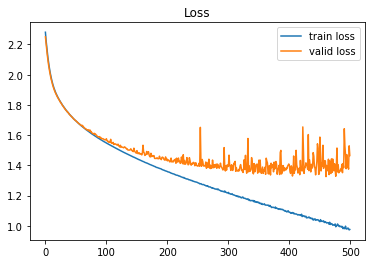

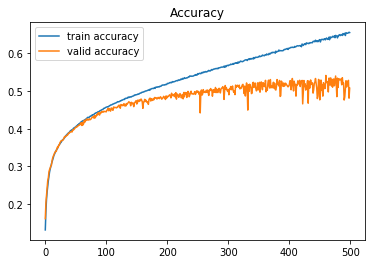

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()